# Debug Notebook

This notebook serves as a debug workspace so I can keep the other notebooks clean.
All function definitions and capture code preamble is loaded into this workbook to replicate a test space.

## Initialize the Notebook

In [1]:
import numpy as np
import scipy as sp
import pandas
from scipy import interpolate
import time

import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

import timeit as T


print 'Complete'

Complete


## Importing Earth Density Data (PREM500)
The raw data from PREM500 has been converted into MKS units, however, the table where that data came from [51] gives the radius in $km$ and density in $kg/cm^3$

In [2]:
# Radius is column 1, Density is column 2
# Radius in meters: verified by REF [51] Table 1 pg. 312
# Density in Kg/m^3, verified by REF [51] Table 1 pg. 312

# This section grabs the data and converts it to MKS units
data = pandas.read_csv('PREM500.csv', sep = ',')
radiusTemp1 = data[[0]]  # Radius in Meters
densityTemp1 = data[[1]] # Density in kg/m^3


# The interpolation function doesn't like these objects, so they need to be massaged into 1-D numpy arrays
radiusListBadUnits = np.asarray(radiusTemp1).squeeze()
densityListBadUnits = np.asarray(densityTemp1).squeeze()

print 'Complete'

Complete


### A Note on Units:
The variable radiusListBadUnits has units of Meters

The variable densityListBadUnits has units of kg/m^3

The following cell converts the length of both to cm.

In [3]:
radiusList = radiusListBadUnits * 100
densityList = densityListBadUnits * (100)**-3 * 1000

print 'Complete'

Complete


### Shell Thickness Check

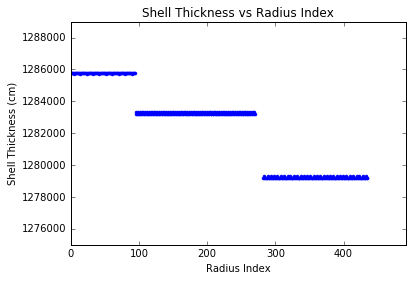

Complete


In [4]:
radius2 = radiusList[0:len(radiusList)-1]
s = [0]
for i in radius2:
    s.append(i)

deltaRList = radiusList[0:len(radiusList)] - s[0:len(s)]

xRange = range(0,len(radiusList))

plt.plot(xRange,deltaRList,'.')
plt.title('Shell Thickness vs Radius Index')
plt.xlabel('Radius Index')
plt.ylabel('Shell Thickness (cm)')
plt.axis([0,491,1.275e6,1.289e6])
plt.show()

print 'Complete'

### Shell Density Check

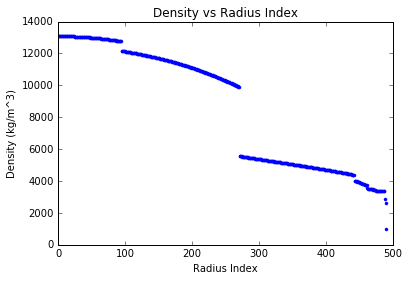

Complete


In [5]:
plt.plot(xRange,densityListBadUnits,'.')
plt.xlabel('Radius Index')
plt.ylabel('Density (kg/m^3)')
plt.title('Density vs Radius Index')
plt.show()
print 'Complete'

### Enclosed Mass Check

In [6]:
mass = 0
for i in xRange:
    mass = mass + 4. * np.pi * radiusList[i]**2 * densityList[i] * deltaRList[i]
print 'Enclosed mass = %e g' % mass

print 'Complete'

Enclosed mass = 5.990577e+27 g
Complete


### Shell Mass
Given a radius *index*, shellMass returns the mass of the shell at that radius index

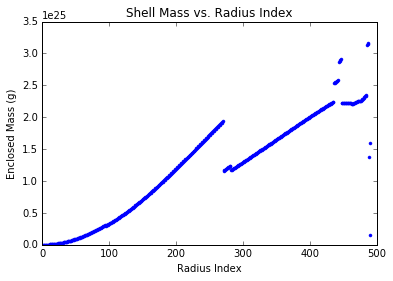

Complete


In [7]:
shellMassList = []

for i in xRange:
    shellMassList.append(4 * np.pi * radiusList[i]**2 * densityList[i] * deltaRList[i])

plt.plot(xRange,shellMassList,'.')
plt.title('Shell Mass vs. Radius Index')
plt.xlabel('Radius Index')
plt.ylabel('Enclosed Mass (g)')

plt.show()

# print shellMassList[0:4]
print 'Complete'

### Enclosed Mass at Each Radius

Give enclosedMass the *index* of the radius, and it returns the mass enclosed up to that radius.

This is a list, not an interpolated function, so it only works for valid radii.

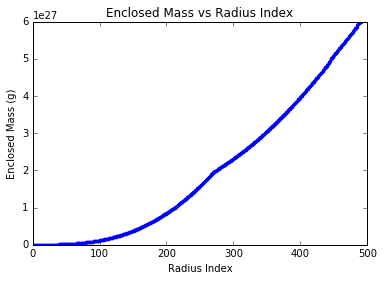

Complete


In [8]:
# This is with a radius list and a shellMass list
enclosedMassList = []
tempSum = 0
for i in shellMassList:
    tempSum = tempSum + i
    enclosedMassList.append(tempSum)
    
plt.plot(xRange,enclosedMassList,'.')
plt.title('Enclosed Mass vs Radius Index')
plt.xlabel('Radius Index')
plt.ylabel('Enclosed Mass (g)')
# plt.axis([0,550,0,6.5e24])
plt.show()

# print enclosedMassList[0:4]

print 'Complete'

## Conversions and Atomic Definitions

In the following cell, we initialize usefull unit conversions and dictionaries storing various atomic information.

In [9]:
################################################################################
# Conversions
################################################################################

def amu2Gev(par1):
#     return 0.9314941 * par1 # GeV
    return 0.938272 * par1 # Taken directly from Flip notebook

def amu2g(par1):
    return 1.66053892*10**-24 * par1 # g

def GeV2s(par1):
    return 1.52*10**24 * par1 # s^-1

def s2GeV(par1):
    return 1.52*10**24 * par1 # GeV^-1

def GeV2cm(par1):
    return 5.06*10**13 * par1 # cm^-1

def cm2GeV(par1):
    return 5.06*10**13 * par1 # GeV^-1

def KeltoGeV(par1):
    return 8.62*10**-14 * par1 # GeV

def s2yr(par1):
    return 3.16888*10**-8 * par1 # Yr

def ev2Gev(par1):
    return par1 * 10**6 # GeV

def eV2kg(par1):
    return 1.782661845* 10**-36 * par1 # kg

def g2Gev(par1):
    return 5.609588845*10**32 * par1 #GeV


################################################################################
# Atomic Dictionary Definitions
################################################################################

elementList = [
    'O16' ,
    'Si28',
    'Mg24',
    'Fe56',
    'Ca40',
    'P31' ,
#     'Na11',
    'S32' ,
    'Ni58',
    'Al27',
    'Cr52',
]

atomicNumbers = {
    'H1': 1.,
    'He4': 4.,
    'He3': 3.,
    'Na11': 23.,
    'C12': 12.,
    'C13':13.,
    'N14':14.,
    'N15':15.,
    'O16':16.,
    'O17':17. ,
    'O18':18.,
    'Ne20':20.,
    'Na23':23.,
    'Mg24':24., # 78%
    'Al27':27.,
    'Si28':28.,
    'P31':30.,
    'S32':32.,
    'Cl35':35., # 75%
    'Ar40':40.,
    'K39':39.,
    'Ca40':40.,
    'Sc45':45.,
    'Ti48':48., # 74%
    'V51':51.,
    'Cr52':52., # 83%
    'Mn55':55.,
    'Fe56':56.,
    'Co59':59.,
    'Ni58':59., # 58%
}

nProtons = { # This is Z_N
    'H1':1.,
    'He3':2.,
    'He4':2.,
    'He3':2.,
    'Na11': 11.,
    'C12':6.,
    'C13':6.,
    'N14':7.,
    'N15':7.,
    'O16':8.,
    'O17':8.,
    'O18':8.,
    'Ne20':10.,
    'Na23':11.,
    'Mg24':12., # 78%
    'Al27':13.,
    'Si28':14.,
    'P31':15.,
    'S32':16.,
    'Cl35':17., # 75%
    'Ar40':18.,
    'K39':19.,
    'Ca40':20.,
    'Sc45':21.,
    'Ti48':22., # 74%
    'V51':23.,
    'Cr52':24., # 83%
    'Mn55':25.,
    'Fe56':26.,
    'Co59':27.,
    'Ni58':28., # 58%
}

# Mass Fraction Dictionary
coreMassFrac = {
    'Na11': 0.0,
    'O16' : 0.0,
    'Mg24': 0.0,
    'Al27': 0.0,
    'Si28': 0.06,
    'P31' : 0.002,
    'S32' : 0.019,
    'Ca40': 0.0,
    'Cr52': 0.009,
    'Fe56': 0.855,
    'Ni58': 0.052,
}

mantleMassFrac = {
    'Na11': 0.0027,
    'O16' : 0.440,
    'Mg24': 0.228,
    'Al27': 0.0235,
    'Si28': 0.210,
    'P31' : 0.00009,
    'S32' : 0.00025,
    'Ca40': 0.0253,
    'Cr52': 0.0026,
    'Fe56': 0.0626,
    'Ni58': 0.00196,
}
print 'Complete'

Complete


## Model Parameters and Constants

In this cell, we initialize all model parameters as global variables.

In [10]:
################################################################################
# Constants
################################################################################
global c
global G
global M_E
global R_earth
global V_dot
global V_cross
global V_gal
global u_0
global k
global n_X
global mf

c = 3.0*10**10 # cm/s
G = 6.674e-11 * 100**3 *(1000)**-1 # cm^3/g s 
# M_E = 5.972e27 # g
# R_earth = 6.37e6 # m
V_dot = 220.0*10**5 # cm/s
V_cross = 298.0*10**5 # cm/s
V_gal = 550.0*10**5 # cm/s
u_0 = 245.0*10**5 # cm/s
k = 2.5

print 'Complete'

Complete


## Escape Velocity: $v_{\oplus}(r)$

The escape velocity in natural units is given by:
$$ V_{esc}^2 = \frac{2G}{c^2} \left[ \int_{0}^{R_{earth}} \frac{M_{enc}(s)}{s^2} \, ds + \frac{M_{total}}{R_{earth}} \right] $$

However, we are given discretized data, so we convert the integral into a discrete sum over the radius of earth:
$$ V_{esc}^2 = \frac{2G}{c^2} \left[ \sum_i \frac{M_{enc}(s)}{s^2} \, \Delta R + 
\frac{M_{total}}{R_{earth}} \right] $$

where $M_{enc}(s)$ is the mass enclosed at radius $s$ and $\Delta R$ is the change in radius going from the previous radius  to the current radius $\Delta R =$ r[i] - r[i-1].

The accumulate function acts just like the "Accumulate" in mathematica. It adds up whatever the summand is starting at "index" and sums over the length of the radius index.


Escape Velocities are stored in the list: escVel2List

Note: The value from escVel2List[1] is assigned to the first slot of escVel2List to work around a 'nan' escape velocity at r=0

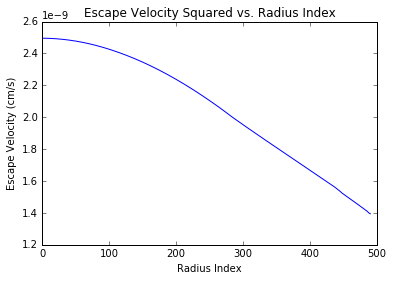

Complete


In [11]:
def accumulate(index):
    factor = 2.*G/c**2
    constant = max(enclosedMassList) / max(radiusList)
    
    tempSum = 0    
    for i in range(index,len(radiusList)-1):
        summand = enclosedMassList[i] * deltaRList[i] / (radiusList[i])**2
        tempSum += summand
        
    return factor*(tempSum + constant)

escVel2List = []
for i in xRange:
    escVel2List.append(accumulate(i))
#     escVel2List.append(escVel(i))
# escVel2List[0] = escVel2List[1] # 
    
    
    
plt.plot(xRange,escVel2List)
plt.xlabel('Radius Index')
plt.ylabel('Escape Velocity (cm/s)')
plt.title('Escape Velocity Squared vs. Radius Index')
plt.show()          
    
# plt.plot(radiusList,escVel2List,'.')
# plt.xlabel('Radius (m)')
# plt.ylabel('Escape Velocity (m/s)')
# plt.title('Escape Velocity vs. Radius')
# plt.show()


# print escVel2List[0:4]

print 'Complete'



## Number Densities

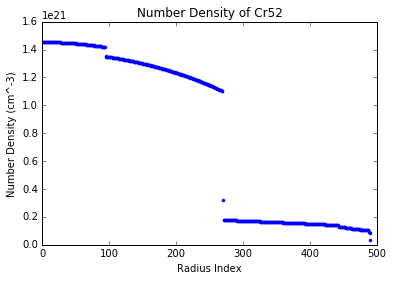

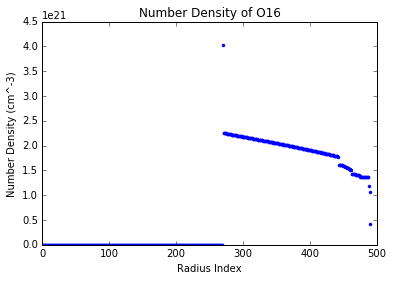

Complete


In [12]:
range1 = range(0,len(radiusList))
mf = 0

def numDensityList(element):
    numDensityList = []
    for i in range1:
        if radiusList[i] < 348000000:
            mf = coreMassFrac[element]
        elif radiusList[i] >= 348000000:
            mf = mantleMassFrac[element]
        elif radiusList[i] > 348000000:
            mf = 0

        n_i = mf *  densityList[i] /(amu2Gev(atomicNumbers[element])) * 6.02e23
        numDensityList.append(n_i)
        
    return numDensityList


plt.plot(range1, numDensityList('Cr52'),'.')
plt.title('Number Density of Cr52')
plt.xlabel('Radius Index')
plt.ylabel('Number Density (cm^-3)')
plt.show()
plt.plot(range1, numDensityList('Ca40'),'.')
plt.title('Number Density of O16')
plt.xlabel('Radius Index')
plt.ylabel('Number Density (cm^-3)')
plt.show()

# print numDensityList('O16')
print 'Complete'

## List Interpolations

At the present moment, I have the following lists:
    - radius (radius)
    - density (density)
    - shell thickness (deltaR)
    - shell mass (shellMass)
    - enclosed mass (enclosedMass)
    - escape velocity squared (escVel)
    - number density of a *single* element (numDensityList)

I need to interpolate the following lists into functions:
    - density
    - enclosed mass
    - escape velocity squared

In [13]:
# densityInterp = interpolate.interp1d(radiusList,densityList,kind='linear') #kg/cm^3
enclosedMassInterp = interpolate.interp1d(radiusList,enclosedMassList,kind='linear') # kg
escVel2Interp = interpolate.interp1d(radiusList,escVel2List,kind='linear') # 1/c
densityInterp = interpolate.interp1d(radiusList,densityList,kind='linear') # kg/cm^3

# densityInterp = interpolate.interp1d(s,densityList,kind='linear') #kg/m^3
# enclosedMassInterp = interpolate.interp1d(s,enclosedMassList,kind='linear')
# escVel2Interp = interpolate.interp1d(s,escVel2List,kind='linear')

print 'Complete'

Complete


### Escape Velocity Interpolation Check
Note: Over the entire interpolation range, the interpolation is good, but depending on where you zoom in on the graph, it will look off.

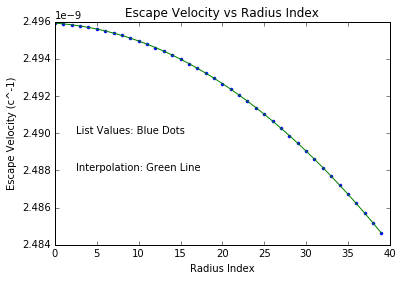

Complete


In [14]:
alist = range(0,40)
tempEsc = []
for i in alist:
    tempEsc.append(escVel2List[i])
    
plt.plot(alist,tempEsc,'b.',alist,escVel2Interp(radiusList[alist]),'g-')
plt.xlabel('Radius Index')
plt.ylabel('Escape Velocity (c^-1)')
plt.title('Escape Velocity vs Radius Index')
plt.text(2.5,2.490e-9,'List Values: Blue Dots')
plt.text(2.5,2.488e-9,'Interpolation: Green Line')
plt.show()
print 'Complete'

# Capture Rate

Our final goal is to calculate:

$$ C^N_{cap} = n_X \, c^N_{cap,red} $$

where  $C^N_{cap,red}$ is the product of three integrals over the radius of earth $r$, the incident DM velocity $u$, and the DM recoil energy $E_R$. 
The reduced capture rate $c^N_{cap,red}$ is given by:

$$
c^N_{cap,red} = 
\int_{0}^{R_{\oplus}}dr \, 4 \pi r^2 n_N(r) 
\int_{0}^{V_{gal}/c} du \, 4 \pi u^2 f(u) \frac{u^2 + v_{\oplus}^2(r)}{u}
\int_{E_{min}}^{E_{max}} \, dE_R \frac{d\sigma_N}{dE_R} \Theta (\Delta E)
$$

where finally, $ \frac{d\sigma_N}{dE_R} $ is given by:

$$ \frac{d\sigma_N}{dE_R} \approx 
8 \pi \epsilon^2 \, \alpha_X \, \alpha \, Z_N^2 \, \frac{m_N}{(u^2 + v_{\oplus})^2(2m_NE_R + m_{A\prime}^2)^2} \left | F_N \right| ^2$$


A summary of all the functions used will be provided at the end of this section.

#### Motivation
The motivation for the following calculations is to reduce the actual computation as much as possible by multiplying by all constant factors at the end of the calculation.

Factors that are pulled out of calculations will be acounted for in a running total for the length of this section under the heading:

##### Factors Removed

## Helm Form Factor: $|F_N(E_R)|^2$
The Helm Form Factor is given by:
$$ \left| F_N(E_R) \right| ^2 = e^{[-E_R/E_N]} $$ (see eqn (10) of arXiv: 1509.07525v2)

where $E_N \equiv \frac{0.114 }{ A_{N}^{5/3}} \space GeV$ is the characteristic energy of a nucleus with atomic number $A_N$

This factor accounts for the effective size of a target nucleus in a DM -- nucleus when an incoming DM particle scatters of a nucleus inside the earth.

In [15]:
def formFactor2(element, E):
    mn = amu2Gev(atomicNumbers[element])
    E_N = 0.114/((atomicNumbers[element])**(5./3))
    FN2 = np.exp(-E/E_N)
    return FN2

print 'Complete'

Complete


## Cross Section Integrand: $ \frac{d\sigma _N}{dE_R} $ (eqn9) arXiv: 1509.07525v2

The following cell modifies the cross section integrand given by:
$$ \text{eqn09Guts}  = \frac{m_N}{(2m_N E_R + m_A\prime ^2)^2} \left| F_N \right|^2  $$

with dimension : $[\text{eqn09Guts}] = \frac{1}{GeV^3}$

##### Factors Removed:  $8\pi \epsilon^2 \alpha_X \alpha Z_N^2$

In [16]:
def eqn09Guts(element, m_A, E):
    mn = amu2Gev(atomicNumbers[element])
    function = (mn * formFactor2(element,E) ) / ((2*mn*E + m_A**2)**2)
    return function

print 'Complete'

Complete


## Incident Dark Matter Velocity Distribution (eqn17)
In the following cell we calculate the normalization constant $N_0$ for the incident dark matter velocity distribution:

$$ \frac{1}{N_0} = \int_{0}^{V_{gal}/c} f(u) \ du = \text{tempA}$$
where $u$ is a naturalized velocity and $f(u)$ is the incident DM velocity distribution which we take to be Maxwell-Boltzmann in shape:

$$ \text{DMVelDist} = f(u) =  N_0 \left[ exp \left ( 
\frac{v^2_{gal}-u^2}{ku^2_0}\right) -1 \right] ^k
\Theta(v_{gal} - u) $$

Typical values for $v_{gal}$ (km/s), $u_0$ (km/s), and $k$ respectively lie between:

$$ 220<u_0<270 \qquad 450<v_{gal}<650 \qquad 1.5<k<3.5 $$

For computations, we take $u_0 = 245\times 10^6$ cm/s, $v_{gal} = 550\times10^6$ cm/s and $k = 2.5$


In [17]:
# u is now a naturalized velocity
def DMVelDistNormalization(u):
# The if-else structure accounts for the Heaviside function
    if ((V_gal/c) - u < 0):
        temp = 0.
        
    elif ( ((V_gal/c) - (u)) >= 0):
        numerator = ((V_gal/c)**2 - (u)**2)
        denominator = (k * (u_0/c)**2)
        arg = ( numerator / denominator)    
        temp = 4*np.pi*(u)**2 * (np.expm1(arg))** k
    return temp


tempA = integrate.quad(DMVelDistNormalization,0,V_gal/c)[0]
N_0 = 1./tempA

def DMVelDist(u, N_1 = N_0):
# The if-else structure accounts for the Heaviside function
# N_1 is the normalization 
    if ((V_gal/c - u) < 0):
        temp = 0
        
    elif ((V_gal/c - u) >= 0):
        numerator = ((V_gal/c)**2 - (u)**2)
        denominator = (k * (u_0/c)**2)
        arg = ( numerator / denominator)    
        temp = N_1 * (np.expm1(arg) ) ** k
    return temp

print 'Complete'

Complete


## Modified Dark Matter Velocity Distribution (eqn16)

The modified distribution $ f_{\oplus}$ is the annular and angular averaged dark matter distribution in the rest frame of Earth given by:

$$ \text{ModDMVelDist} = f_{\oplus}(u) = \frac{1}{4} \int_{-1}^{1}\int_{-1}^{1} dcos\theta \, dcos\phi \space
   f \left[ \left( u^2 (V_{\odot} + V_{\oplus}cos\phi)^2 + 2u(V_{\odot} + V_{\oplus} cos\phi) cos\theta \right) ^{1/2} \right] $$

In [18]:
def ModDMVelDist(u):
    def integrand(x, y): #x = cos(theta), y = cos(phi)
        return 0.25 * DMVelDist( ( u**2 + ((V_dot/c) + (V_cross/c) * y)**2 + 2 * u * ((V_dot/c) + (V_cross/c) * y) *x)** 0.5  )

    return integrate.dblquad(integrand, -1, 1, lambda y: -1, lambda y: 1)[0]


print 'Complete'

Complete


### Graphing and Interpolating the Modified DM Velocity Distribution

#### Graph

Complete


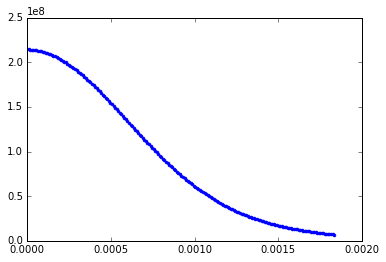

In [19]:
velRange = np.linspace(0,V_gal/c,200)

ModDMVect = []
for vel in velRange:
    ModDMVect.append(ModDMVelDist(vel))
    
plt.plot(velRange,ModDMVect,'.')


print 'Complete'

#### Interpolate

Complete


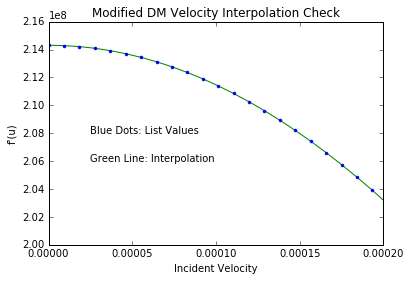

In [20]:
# Interpolate this list
DMVect = []
ModDMVelInterp = interpolate.interp1d(velRange,ModDMVect,kind='linear')

for vel in velRange:
    DMVect.append(ModDMVelInterp(vel))
    

plt.plot(velRange,DMVect,'green', velRange, ModDMVect, 'b.')
plt.axis([0.,0.0002,2.0e8,2.16e8])
plt.xlabel('Incident Velocity')
plt.ylabel("f'(u)")
plt.title('Modified DM Velocity Interpolation Check')
plt.text(0.000025,2.08e8,'Blue Dots: List Values')
plt.text(0.000025,2.06e8,'Green Line: Interpolation')
print 'Complete'

### Emin and Emax Initialization (eqn13)
In the following cell, we initialize the Emin and Emax functions where
$$ E_{Min} = \frac{1}{2} m_X u^2 \qquad E_{Max} = 2 \frac{\mu^2}{m_N} (u^2 + v_{\oplus}^2)$$  

In [21]:
def eMin(u, m_X):
    function = (0.5) * m_X * u**2
    assert (function >=0), '(u, m_X): (%e,%e) result in a negative eMin' % (u, m_X)
    return function

def eMax(element, m_X, rIndex, u):
    mn = amu2Gev(atomicNumbers[element])
    mu = mn*m_X / (mn + m_X)
    vCross2 = escVel2List[rIndex]
    function = 2*mu**2 *(u**2 + vCross2)/mn
    assert (function >= 0), '(element, m_X, rIndex, u): (%s, %e, %i, %e) result in negative eMax' %(element, m_X, rIndex, u)
    return function

print 'Complete'

Complete


## Calculating the Capture Integral
In the following cell, we calculate the velocity and recoil energy integrals:

$$ \text{IntDuDEr} = \int_{0}^{uInt} du\space u \, f(u) \int_{E_{min}}^{E_{Max}} dE_R \space \frac{d \sigma_N}{dE_R} \Theta(\Delta E) $$ 

with dimension: $[ \text{IntDuDEr}] = \frac{1}{GeV^2}$

where $$ u_{int}^2 = \frac{2\mu_N^2}{m_N} \frac{1}{ \left( \frac{1}{2m_X} - \frac{2\mu_N^2}{m_N} \right)  } v_{\oplus}^2 $$

See Appendix A for a discussion of calculating this integral.

##### Factors Removed:  $(4\pi)(8\pi \epsilon^2 \alpha_X \alpha Z_N^2)$

In [22]:
def IntDuDEr(element, m_X, m_A, rIndex):
    mn = amu2Gev(atomicNumbers[element])
    mu = (mn*m_X)/(mn+m_X)
    vCross2 = escVel2List[rIndex]
    
    def integrand(E,u):
#         fu = DMVelDist(u)
        fu = ModDMVelInterp(u)

        inte = eqn09Guts(element, m_A, E) * u * fu
#         inte = eqn09Guts(E, m_A, element) * u

#         assert (inte >= 0), '(E,u): (%e,%e) result in a negative integrand' % (E,u)
        return inte
    
    # Calculate the intersection uInt of eMin and eMax given a specific rIndex
    A = 1/2. * m_X
    B = 2. * mu**2 / mn
    uInt = np.sqrt( ( B * vCross2) / (A-B) )
    
    uLow = 0
    uHigh = uInt
    eLow = lambda u: eMin(u, m_X)
    eHigh = lambda u: eMax(element, m_X, rIndex, u)
    integral = integrate.dblquad(integrand, uLow, uHigh, eLow, eHigh)[0]
    return integral

print IntDuDEr('O16',1,1,20)

print 'Complete'

1.7891666866e-10
Complete


## Sum over radii
In the following cell, we calculate the "integral" over the radius of earth:

$$ \int^{R_{earth}}_{0} dr\space 4\pi r^2 n_N(r) \int_{0}^{uInt} du\space 4\pi u f(u) \int_{E_{min}}^{E_{Max}} dE_R \space \frac{d \sigma_N}{dE_R} \Theta(\Delta E) $$

where we rename the velocity and recoil energy integrals to their respective python function $IntDuDEr$:

$$ \int^{R_{earth}}_{0} dr\space 4\pi r^2 n_N(r) \space IntDuDEr  $$

with dimension $ \frac{m^3}{GeV^2}$

However, instead of calculating this as an integral as stated, we discretize the integral and use the thin-shell approximation:

$$ \frac{4}{3}\pi (r +\Delta r)^3 - \frac{4}{3}\pi r^3 = 4 \pi r^2 \Delta r$$

which yields the discrete summation:

$$ SumOverR = \Sigma_{i} 4 \pi r_i^2 n_N(r) \Delta r_i \space IntDuDEr $$

where the variables $r_i$, $n_N(r)$, and $\Delta r_i$ are given by:
$$ r_i = radiusList[i] \qquad n_N(r) = numDensityList(element)[i] \qquad \Delta r_i = deltaRList[i] $$

It is important to note, $i$ is a pure summation index and all physical quantites depending on i are taken from the respective lists.
 
One could interpolate the radius, number density, and escape velocity lists into functions and perform an actual integration, [reasons why that isn't worthwhile to do]

Note: the functions SumR and SumR1 are the exact same as in Flip's notebook for a double check. SumR doesn't include the number densities though, and SumR1 does.

##### Removed Factors: $(4\pi)(4\pi)(8\pi \epsilon^2 \alpha_X \alpha Z_N^2)$

In [23]:
# I sum over the indicies and call the appropriate dictionaries at each index

# def SumR(element, m_X, m_A):
#     rSum = 0
#     for i in range(0,len(radiusList)):
#         r = radiusList[i]
#         deltaR = deltaRList[i]

#         summand = r**2 * IntDuDEr(element, m_X, m_A, i)*deltaR
#         rSum = rSum + summand
#     return rSum

# def SumR1(element, m_X, m_A):
#     rSum = 0
#     for i in range(0,len(radiusList)):
#         r = radiusList[i]
#         deltaR = deltaRList[i]
#         n_N = numDensityList(element)[i]
        
#         summand = r**2 * n_N *IntDuDEr(element, m_X, m_A, i)*deltaR
#         rSum += summand
#     return rSum

def SumOverR(element, m_X, m_A):
    tempSum = 0
    for i in range(0,len(radiusList)):
        r = radiusList[i]
        deltaR = deltaRList[i]
        n_N = numDensityList(element)[i]
#         summand = r**2*IntDuDEr(element, m_X, m_A, i)*deltaR
        summand = n_N *r**2*IntDuDEr(element, m_X, m_A, i)*deltaR
        tempSum += summand
    return tempSum

print 'Complete'

Complete


## Renaming
Here, we simply rename SumR to CapRed

In [24]:
# def CCapRed(element, m_X, m_A):
#     return SumR(element, m_X, m_A)

# def CCapRed1(element, m_X, m_A):
#     return SumR1(element, m_X, m_A)

# print 'Complete'

## Full Capture Rate: $C^N_{cap}$
The final step is to tack on all of the removed factors and calculate the full capture rate:

$$ \text{fullCap} = \left[(4\pi)(4\pi)(8\pi \epsilon^2 \alpha_X \alpha Z_N^2)\right] n_X \text{sumOverR} $$

where $[n_X] = \frac{1}{cm^3}$ and $[sumOverR] = \frac{1}{GeV^2}$, so $[totalCap] = \frac{1}{cm^3 GeV^2}$

We manually multiply by the following conversions:
$$ \frac{cm \cdot GeV}{5.06\times10^{13}} =  1 \qquad \text{and} \qquad \frac{1.52\times10^{24}}{GeV\cdot s} = 1$$


In [25]:
# def CCap(element, m_X, m_A, epsilon, alpha, alpha_X):
#     n_X = 0.3/m_X # 1/cm^3
#     Z_N = nProtons[element]
    
#     conversion = (5.06e13)**-3*(1.52e24)
#     prefactor = 2 * n_X* (4*np.pi)**3 * epsilon**2 * alpha_X *alpha * Z_N**2 * conversion
#     return prefactor * CCapRed(element, m_X, m_A) 


# def CCap1(element, m_X, m_A, epsilon, alpha, alpha_X):
#     n_X = 0.3/m_X # 1/cm^3
#     Z_N = nProtons[element]

#     conversion = (5.06e13)**-3*(1.52e24)
#     prefactor = 2 * n_X* (4*np.pi)**3 * epsilon**2 * alpha_X *alpha * Z_N**2 * conversion

#     return  n_X * prefactor * CCapRed1(element, m_X, m_A)

def fullCap(element, m_X, m_A, epsilon, alpha, alpha_X):
    Z_N = nProtons[element]
    n_X = 0.3/m_X
    
    conversion = (5.06e13)**-3*(1.52e24)
    prefactor = 2*(4*np.pi)**3*epsilon**2*alpha_X*alpha*Z_N**2 *conversion
    
    return n_X * prefactor * SumOverR(element, m_X, m_A)

# CCapFlip[(n), alphaX, epsilon, m_X, m_A]
# These are the values from ArXiV: 1509.07525v2 Flip Earth paper
CCapFlip0 = {# CCapFlip[(n), alphaX = 0.035, epsilon = 10e-8, m_X = 1000, m_A = 1]
    'O16': 4.03e5,
    'Si28': 2.24e6,
    'Mg24': 1.05e6,
    'Fe56': 9.43e7,
    'Ca40': 9.06e5,
    'P31': 2.04e4,
    'S32': 2.41e5,
    'Ni58': 7.10e6,
    'Al27': 1.62e5,
    'Cr52': 8.98e5 
}

print 'Complete'

Complete


## Capture Rates

In [26]:
for element in elementList:
    print 'C_N: %s = %e' % (element, fullCap(element, 1000., 1., 10.0**-8, 1./137, 0.035))
    
print 'Complete'

C_N: O16 = 5.419333e+05


KeyboardInterrupt: 

## Error Calculations based on Table I in ArXiV: 1509.07525v2
TO DO: Go through Jordan's Notebook and see what he did and compare it with what I did.

In [54]:
CCapAdam0 = {}
# CCap(element, m_X, m_A, epsilon, alpha, alpha_X)
for element in elementList:
    CCapAdam0[element] = fullCap(element, 1000., 1., 1e-8, 1./137, 0.035)
    
print 'Complete'

Complete


In [56]:
for element in elementList:
    print 'Percent error on CCapAdam5[%s]: %e' % (element, \
            (CCapAdam0[element] - CCapFlip0[element])*100/CCapFlip0[element])

print 'Complete'

Percent error on CCapAdam5[O16]: 3.447478e+01
Percent error on CCapAdam5[Si28]: 3.389069e+01
Percent error on CCapAdam5[Mg24]: 3.546016e+01
Percent error on CCapAdam5[Fe56]: 3.010680e+01
Percent error on CCapAdam5[Ca40]: 3.461569e+01
Percent error on CCapAdam5[P31]: 2.977928e+01
Percent error on CCapAdam5[S32]: 3.017061e+01
Percent error on CCapAdam5[Ni58]: 2.999220e+01
Percent error on CCapAdam5[Al27]: 3.444542e+01
Percent error on CCapAdam5[Cr52]: 3.100180e+01
Complete


## Jordan's Method

Here's Jordan's algorithm:
1. Define a DM mass
2. Define a range of mediator masses
3. Define an element
4. Calculate the CapRate for that element for the given DM mass and range of mediator masses
5. Repeat step 4 for all elements
6. For a given m_X and m_A, add all the CapRates together
    - This gives a single point in (m_X, m_A) parameter space
7.
    
    
fullCap(element, m_X, m_A, epsilon, alpha, alpha_X)

In [27]:
DMMass = 1000. # GeV
MediatorLow = 0.001 # GeV
MediatorHigh = 10 # GeV


MasterDictionary = {
    'O16' : [],
    'Si28' : [],
    'Mg24' : [],
    'Fe56': [],
    'Ca40': [],
    'P31' : [],
#     'Na11',
    'S32' : [],
    'Ni58' : [],
    'Al27' : [],
    'Cr52' : [],
}


MediatorRange = np.linspace(MediatorLow,MediatorHigh,20)

for element in MasterDictionary:
    for Testm_A in MediatorRange:
        MasterDictionary[element].append(fullCap(element,DMMass,Testm_A,10**-8,1./137,0.035))


    
print 'Complete'

Complete


- MasterDictionary is a dictionary of arrays which stores the capture rates for all elements for mediator masses from 1MeV to 10GeV (This is a 10 element dictionary of 20-element arrays)
- I want to add each corresponding elements of each array into a new array. (This is the Total Capture rate, the sum of the capture rates for all elements given a m_X and m_A

In [34]:
TotalCapArray = {
    'O16' : [],
    'Si28' : [],
    'Mg24' : [],
    'Fe56': [],
    'Ca40': [],
    'P31' : [],
#     'Na11',
    'S32' : [],
    'Ni58' : [],
    'Al27' : [],
    'Cr52' : [],
}


for i in range(0,len(MasterDictionary['O16'])):
    for element in MasterDictionary:
        value = MasterDictionary[element][i]
        TotalCapArray[element].append(value)

# plt.plot(MediatorRange,LongArrayO16)

print 'Complete'

Complete


In [38]:
print TotalCapArray['O16']


[1.4883341997932634e+17, 7011869.6750148861, 439910.58699975524, 87006.070323405889, 27546.707241289168, 11287.420183682141, 5444.7725437462605, 2939.4845273306173, 1723.3057496491529, 1075.9648759543925, 706.00017677450899, 482.24094108732174, 340.51389787069439, 247.23364809596384, 183.81755324264276, 139.49216231238333, 107.75778758727141, 84.556120156726109, 67.276207260190191, 54.193446131448425]


------------

## Python Function Summary: (TO DO)
This is a list of all the functions, input parameters, and return values in this notebook.

**accumulate(index)**: accululates the summand (see function definition) from 'index' to the final index of the radiusList

**numDensityList(element)[index]**: returns the number density of 'element' at 'index'

**formFactor2(E, element)**: returns the form factor squared of 'element' with recoil energy 'E'

**eqn09Guts(E, m_A, element)**: returns $\frac{m_N}{2m_N E_R + m_A\prime ^2} \text{formFactor2}$ for 'element' and recoil energy 'E'

**DMVelDistNormalization(u)**: returns the reciprocal of the normalization $N_0$

**DmVelDist(u, N_0 = N_01)**: returns the fraction of DM partiles with incident velocity 'u' in the Galactic Frame 

**ModDMVelDist(u)**: returns the fraction of DM particles with incident velocity 'u' in the Earth Frame

**eMin(u, m_X)**: returns $ E_{Min} = \frac{1}{2} m_X u^2 $

**emax(u, rIndex, m_X, element)**: returns $E_{Max} = 2 m_N m_X^2 \frac{(u^2 + v_{\oplus}^2)}{(m_N + m_X)^2}$

**IntDuDEr(rIndex, m_X, m_A, element)**: returns $ \int_{0}^{uInt} \, \int_{eMin}^{eMax} \, \text{u(eqn09Guts)(DMVelDist)} \, dE_R \, du $

**SumOverR(m_X, m_A, element)**: returns $\Sigma_i \, n_N(r) \, r^2 \, \text{IntDuDEr} \, \Delta r $

**totalCap(m_X, m_A, epsilon, alpha, alpha_X, element)**: returns the total capture rate of 'element' $\left[(4\pi)(4\pi)(8\pi \epsilon^2 \alpha_X \alpha Z_N^2)\right] \, n_X \, \text{SumOverR} $



-----------

# Appendix

## A: Python Integration Analysis for the capture integrand
If we try to calculate the capture integral directly in natural units, integrating $u$ from $0$ to $v_{gal}/c$ and $E_R$ from $E_{min}$ to $E_{max}$, we find that the integral returns zero. The differential cross section $\frac{d \sigma_N}{dE_R}$ (eqn09) never vanishes unless one of the model parameters is zero, the incident DM velocity $f(u)$ is never zero for the integraion region over $u$, so the only time the integrand vanishes is at $u=0$, the lower limit of integration. Clearly, there is something more subtle that we need to explore.

To simplify the problem, we choose $m_X = 1$ GeV, and calculate values of Silicon (Si28). We completely remove the integrand and begin by plotting the integration bounds $E_{min}$ and $E_{max}$ in red and blue respectively. The valid region of integration from the heaviside function in eqn (1) is thus above the red curve and below the blue curve.

In [ ]:
vMax = escVel2List[0]
mn2 = amu2Gev(atomicNumbers['Si28'])
array1 = []
array2 = []
array3 = []
array4 = []
pltrange0 = np.linspace(0,(V_gal/c),100)
pltrange1 = np.linspace(0,0.00005,100)

# populate array1 and array2
for i in pltrange0:
    emin = (1*i**2)/2
    emax = 2*mn2*1**2*(i**2+vMax)/(mn2+1)**2
    eLim = 2*mn2*1**2*(1+vMax)/(mn2+1)**2
    
    array1.append(emin)
    array2.append(emax)
    
# populate array3 and array4
for i in pltrange1:
    emin = (1*i**2)/2
    emax = 2*mn2*1**2*(i**2+vMax)/(mn2+1)**2
    eLim = 2*mn2*1**2*(1+vMax)/(mn2+1)**2
    
    array3.append(emin)
    array4.append(emax)
    
print 'complete'

In [ ]:
# Plot 1
plt.figure(1)
plt.plot(pltrange0,array1,'red')
plt.plot(pltrange0,array2,'blue')
plt.xlabel('Naturalized Velocity: u')
plt.ylabel('E_R (GeV)')
plt.title('Plot over the entire integration limits')
plt.text(0.00025,1.45e-6,'Red: Emin')
plt.text(0.00025,1.25e-6,'Blue: Emax')
plt.grid()

# Plot too
plt.figure(2)
plt.plot(pltrange1,array3,'red')
plt.plot(pltrange1,array4,'blue')
plt.xlabel('Naturalized Velocity: u')
plt.ylabel('E_R (GeV)')
plt.title('Zoom into the origin')
plt.axis([0,0.000025,0,2.5e-10])
plt.text(1.5e-5,0.75e-10,'Red: Emin')
plt.text(1.5e-5,0.5e-10,'Blue: Emax')
plt.grid()
print 'Complete'

Recalling that the valid region of integration is *above* the red curve and *below* the blue curve, it doesn't appear that there is **any** nonzero region. Therefor, there must be some region very close to the origin where these two functions yield a nonzero integrand. We investigate further by zooming into the origin, as shown in figure (2).

We can see that only for $u$ between $0$ and $\approx 0.00002$ is the $E_{max}$ actually above $E_{min}$, which means that in the integration limits as stated above, the integrand vanishes for nearly the entire region due to the Heaviside function. To make matters worse, the Python intetegrator  never chooses $u$ values between $0$ and $\approx 0.00002$, giving the illusion that the integral is zero even though it isn't.

The solution is:
    - Solve for the intersection point of Emin and Emax, name it "uInt"
    - Integrate u from 0 to uInt
    - Integrate E_R from eMin(u) to eMax(u)

The values of $E_{min}$ and $E_{max}$ both depend on $u$, so the natural solution is for each $u$ value, "zoom in" to the region where the integrand is nonvanishing and calculate the integral in that region. This is acomplished by calculating the $u$ value at the intersection point $E_{min} = E_{max}$. Substituting $ w^2 = u^2 + v_{\oplus}^2$ gives:

$$ \frac{1}{2}m_X u^2 = \frac{2\mu_N^2}{m_N}(u^2 + v_{\oplus}^2) $$

solving for the intersection point $u_{int}$ yields:

$$ u_{int}^2 = \frac{2\mu_N^2}{m_N} \frac{1}{ \left( \frac{1}{2m_X} - \frac{2\mu_N^2}{m_N} \right)  } v_{\oplus}^2 $$

In the function definition, I have made the substitutions:
$$ A = \frac{1}{2}m_X \qquad \text{and} \qquad B = 2 \frac{\mu_N^2}{m_N}$$

yielding: 
$$ \text{uInt} = \sqrt{ \frac{B}{A-B}}\,v_{\oplus} $$
The actual coded function is:

$$ IntDuDEr = \int_{0}^{uInt} du \, u f(u) \int_{E_{min}}^{E_{Max}} dE_R \, \frac{d \sigma_N}{dE_R}  $$


where $\Theta(\Delta E)$ is accounted for in the limits of the $u$ integration.

One could obtain more accuracy by using the modified velocity distrubution given by:

$$ f_{\oplus}(u) = \frac{1}{4} \int\int_{-1}^{1} dcos\theta \space dcos\phi \space
   f \left[ \left( u^2 (V_{\odot} + V_{\oplus}cos\phi)^2 + 2u(V_{\odot} + V_{\oplus} cos\phi) cos\theta \right) ^{1/2} \right] $$
   
which is coded into the Python function: ModDMVelDist

-----------